# Proyek UTS Pendata

##Install Pustaka
pip install ucimlrepo digunakan untuk menginstal pustaka Python bernama ucimlrepo dari Python Package Index (PyPI). Pustaka ini memungkinkan kita untuk mengakses dataset dari UCI Machine Learning Repository secara langsung lewat kode Python, tanpa perlu mengunduh file secara manual.



In [1]:
pip install ucimlrepo

## Import dataset

Import dataset digunakan untuk mengambil data yang ada pada repository atau dataset yang dipublikasi yang akan digunakan untuk menganalisis datanya.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

## 1. Analisis Data dan Visualisasi Serta Korelasi Fitur dalam Dataset (DATA UNDERSTANDING)

data Teratas: Menampilkan lima baris pertama dataset yang membantu untuk melihat gambaran umum data dan memeriksa apakah ada masalah atau keanehan dalam pengambilan data.

Struktur Data: Dengan fungsi info(), kita mendapatkan gambaran tentang jumlah kolom, tipe data, serta jumlah data non-null pada setiap kolom. Ini penting untuk memastikan bahwa dataset terstruktur dengan benar.

Statistik Deskriptif: Fungsi describe() memberikan statistik dasar dari data numerik, seperti rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil. Statistik deskriptif ini membantu dalam memahami distribusi dan variabilitas data.

Missing Values: Melalui pengecekan missing values, kita dapat mengetahui apakah ada data yang hilang dalam dataset. Hal ini penting untuk mengetahui langkah-langkah perbaikan yang diperlukan, seperti imputasi atau penghapusan baris/kolom yang mengandung missing value.

Distribusi Kategori: Untuk kolom kategorikal, kita melihat distribusi nilai menggunakan value_counts(). Ini penting untuk memahami proporsi masing-masing kategori dan apakah ada ketidakseimbangan dalam data yang dapat mempengaruhi analisis.

Distribusi Umur: Jika kolom Age ada, kita memvisualisasikan distribusinya dengan histogram dan KDE (Kernel Density Estimation). Ini memberikan gambaran visual tentang sebaran usia dalam dataset, apakah terdistribusi merata atau terkonsentrasi pada rentang usia tertentu.

Korelasi Antar Fitur: Dengan visualisasi heatmap korelasi, kita dapat melihat hubungan antar fitur numerik. Korelasi ini membantu dalam menentukan apakah ada fitur yang sangat berhubungan satu sama lain, yang dapat berguna dalam pemilihan fitur atau teknik pengurangan dimensi.

 5 Data Teratas:
              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage Status  
0         12.2    4.0     

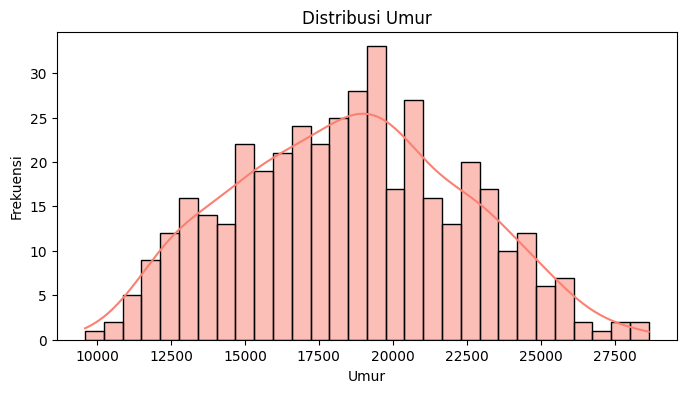

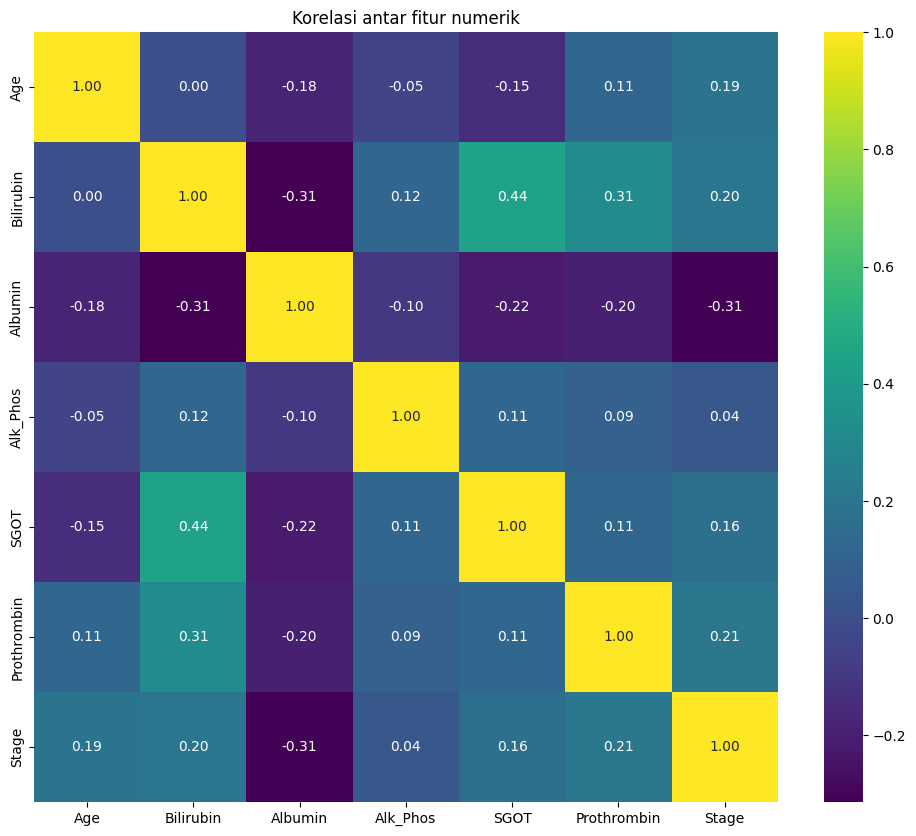


Informasi Variabel:
             name     role         type demographic  \
0              ID       ID      Integer        None   
1          N_Days    Other      Integer        None   
2          Status   Target  Categorical        None   
3            Drug  Feature  Categorical        None   
4             Age  Feature      Integer         Age   
5             Sex  Feature  Categorical         Sex   
6         Ascites  Feature  Categorical        None   
7    Hepatomegaly  Feature  Categorical        None   
8         Spiders  Feature  Categorical        None   
9           Edema  Feature  Categorical        None   
10      Bilirubin  Feature   Continuous        None   
11    Cholesterol  Feature      Integer        None   
12        Albumin  Feature   Continuous        None   
13         Copper  Feature      Integer        None   
14       Alk_Phos  Feature   Continuous        None   
15           SGOT  Feature   Continuous        None   
16  Tryglicerides  Feature      Integer     

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan fitur dan target agar mudah dianalisis bersama
df = pd.concat([X, y], axis=1)

# 1. Tampilkan data teratas
print(" 5 Data Teratas:")
print(df.head())

# 2. Info struktur data
print("\n Info Struktur Data:")
print(df.info())

# 3. Statistik deskriptif
print("\n Statistik Deskriptif:")
print(df.describe(include='all'))

# 4. Cek missing value
print("\n Jumlah Missing Values Tiap Kolom:")
print(df.isnull().sum())

# 5. Distribusi kategori (jika ada kolom kategorikal)
kategori_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in kategori_cols:
    print(f"\n Distribusi nilai pada kolom '{col}':")
    print(df[col].value_counts())

# 6. Visualisasi distribusi umur (jika ada)
if 'Age' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Age'], bins=30, kde=True, color='salmon')
    plt.title('Distribusi Umur')
    plt.xlabel('Umur')
    plt.ylabel('Frekuensi')
    plt.show()

# 7. Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("Korelasi antar fitur numerik")
plt.show()

print("\nInformasi Variabel:")
print(cirrhosis_patient_survival_prediction.variables)


## 2. Pemrosesan awal data (Preprocessing)

Kode di bawah melakukan serangkaian tahapan preprocessing data untuk dataset pasien sirosis hati. Pertama, data numerik dan kategorikal dipisahkan untuk memudahkan imputasi nilai yang hilang.

Kolom numerik diimputasi menggunakan rata-rata (mean), sementara kolom kategorikal diimputasi menggunakan nilai yang paling sering muncul (most_frequent). Setelah itu, kolom numerik dan kategorikal yang telah diimputasi digabungkan kembali. Selanjutnya, kolom kategorikal diubah menjadi variabel biner (one-hot encoding) menggunakan pd.get_dummies(). Fitur numerik kemudian distandarisasi dengan menggunakan StandardScaler untuk memastikan bahwa setiap fitur memiliki skala yang sama. Terakhir, data dipisahkan menjadi data pelatihan dan pengujian (80:20) dengan menggunakan train_test_split. Hasil akhir dari preprocessing ini adalah data yang siap digunakan untuk analisis atau pelatihan model, dengan ukuran data pelatihan dan pengujian yang ditampilkan pada output.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Mengambil data dan target
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# Menampilkan kolom-kolom dalam X
print("Kolom dalam X:")
print(X.columns)

# 1. Memisahkan kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# 2. Imputasi untuk kolom numerik (menggunakan mean)
num_imputer = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)
print("\nSetelah imputasi kolom numerik:")
print(X_num.head())  # Menampilkan 5 baris pertama dari kolom numerik yang telah diimputasi

# 3. Imputasi untuk kolom kategorikal (menggunakan modus / nilai yang paling sering muncul)
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(cat_imputer.fit_transform(X[cat_cols]), columns=cat_cols)
print("\nSetelah imputasi kolom kategorikal:")
print(X_cat.head())  # Menampilkan 5 baris pertama dari kolom kategorikal yang telah diimputasi

# 4. Menggabungkan kembali kolom numerik dan kategorikal
X_clean = pd.concat([X_num, X_cat], axis=1)
print("\nSetelah penggabungan kolom numerik dan kategorikal:")
print(X_clean.head())  # Menampilkan 5 baris pertama setelah penggabungan

# 5. Encoding kolom kategorikal
X_encoded = pd.get_dummies(X_clean)
print("\nSetelah encoding kolom kategorikal:")
print(X_encoded.head())  # Menampilkan 5 baris pertama setelah encoding

# 6. Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
print("\nSetelah scaling fitur numerik:")
print(pd.DataFrame(X_scaled, columns=X_encoded.columns).head())  # Menampilkan 5 baris pertama setelah scaling

# 7. Memisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan informasi mengenai data setelah preprocessing
print("\nData setelah preprocessing:")
print(f"Shape data training: {X_train.shape}")
print(f"Shape data testing: {X_test.shape}")


Kolom dalam X:
Index(['Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

Setelah imputasi kolom numerik:
       Age  Bilirubin  Albumin  Alk_Phos    SGOT  Prothrombin  Stage
0  21464.0       14.5     2.60    1718.0  137.95         12.2    4.0
1  20617.0        1.1     4.14    7394.8  113.52         10.6    3.0
2  25594.0        1.4     3.48     516.0   96.10         12.0    4.0
3  19994.0        1.8     2.54    6121.8   60.63         10.3    4.0
4  13918.0        3.4     3.53     671.0  113.15         10.9    3.0

Setelah imputasi kolom kategorikal:
              Drug Sex Ascites Hepatomegaly Spiders Edema Cholesterol Copper  \
0  D-penicillamine   F       Y            Y       Y     Y         261    156   
1  D-penicillamine   F       N            Y       Y     N         302     54   
2  D-penicillamine   M   

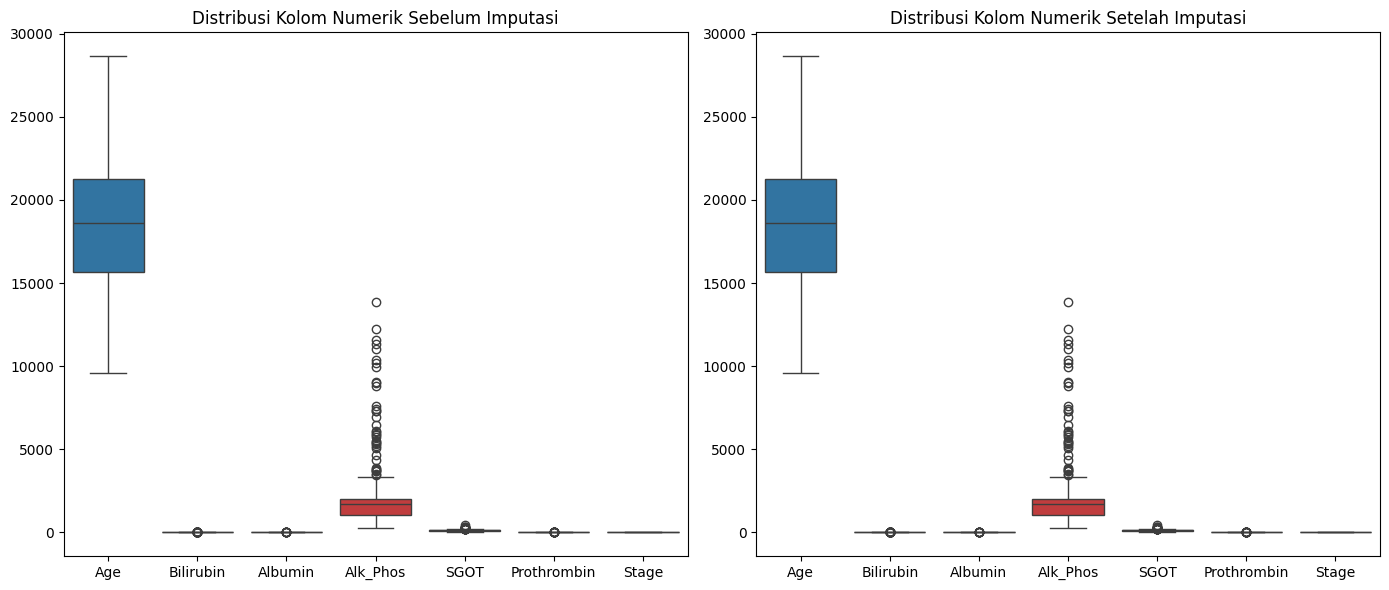

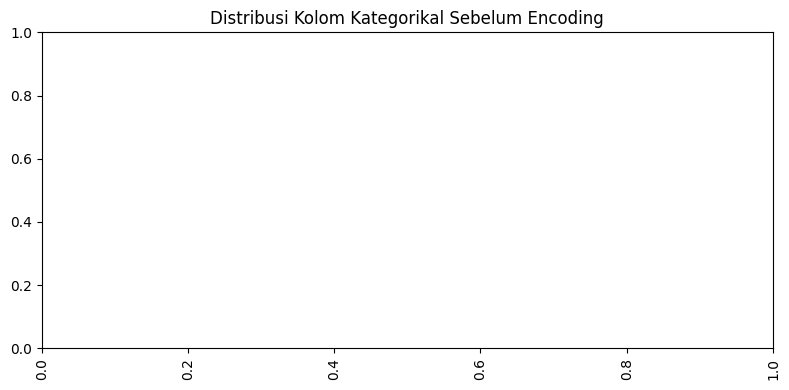

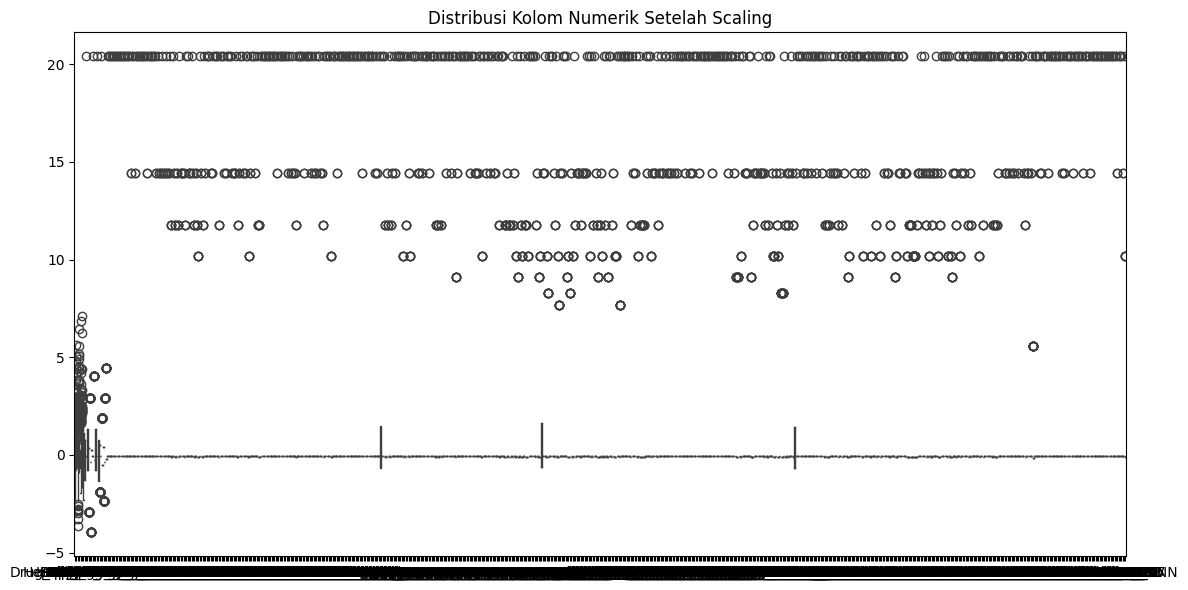

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualisasi distribusi kolom numerik sebelum dan setelah imputasi
plt.figure(figsize=(14, 6))

# Sebelum imputasi
plt.subplot(1, 2, 1)
sns.boxplot(data=X[num_cols])
plt.title("Distribusi Kolom Numerik Sebelum Imputasi")

# Setelah imputasi
plt.subplot(1, 2, 2)
sns.boxplot(data=X_num)
plt.title("Distribusi Kolom Numerik Setelah Imputasi")

plt.tight_layout()
plt.show()

# 2. Visualisasi distribusi kolom kategorikal (sebelum dan setelah encoding)
# Sebelum encoding
plt.figure(figsize=(8, 4))
X_cat_mode = X[cat_cols].mode().iloc[0]  # Mengambil modus sebagai representasi
sns.countplot(data=X[cat_cols], palette='viridis')
plt.title("Distribusi Kolom Kategorikal Sebelum Encoding")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Visualisasi distribusi fitur numerik setelah scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=X_encoded.columns))
plt.title("Distribusi Kolom Numerik Setelah Scaling")
plt.tight_layout()
plt.show()




## 3. Pemodelan (model klasifikasi)
Pada tahap pemodelan, dua algoritma klasifikasi digunakan yaitu **Logistic Regression** dan **Random Forest**. Logistic Regression digunakan sebagai baseline model karena sederhana dan efektif untuk interpretasi awal. Model ini dilatih menggunakan data training yang telah dipreproses, kemudian dilakukan prediksi terhadap data testing. Hasil evaluasi menunjukkan akurasi sekitar 64%, namun model ini kurang mampu memprediksi kelas minoritas seperti 'CL', ditunjukkan dengan nilai precision dan recall yang nol.

Sebaliknya, model **Random Forest** menunjukkan performa lebih baik dengan akurasi mencapai 75%. Model ini mampu menangani kompleksitas data dan menghasilkan prediksi yang lebih seimbang antar kelas dibandingkan Logistic Regression. Meskipun kelas 'CL' tetap sulit diprediksi karena data yang tidak seimbang, Random Forest memberikan nilai f1-score dan recall yang lebih tinggi untuk kelas 'C' dan 'D', menunjukkan kemampuannya menangkap pola yang lebih kompleks dalam data.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Pemodelan dengan Logistic Regression
log_reg_model = LogisticRegression(max_iter=10000, random_state=42)
log_reg_model.fit(X_train, y_train)

# 2. Prediksi dengan Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)

# 3. Evaluasi model Logistic Regression
print("\nModel Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# 4. Pemodelan dengan Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# 6. Evaluasi model Random Forest
print("\nModel Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model Logistic Regression:
Accuracy: 0.6428571428571429

Classification Report:
              precision    recall  f1-score   support

           C       0.65      0.75      0.69        44
          CL       0.00      0.00      0.00         4
           D       0.70      0.58      0.64        36

    accuracy                           0.64        84
   macro avg       0.45      0.44      0.44        84
weighted avg       0.64      0.64      0.64        84


Model Random Forest:
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           C       0.77      0.84      0.80        44
          CL       0.00      0.00      0.00         4
           D       0.72      0.72      0.72        36

    accuracy                           0.75        84
   macro avg       0.50      0.52      0.51        84
weighted avg       0.71      0.75      0.73        84



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-36-40de4e035eba>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


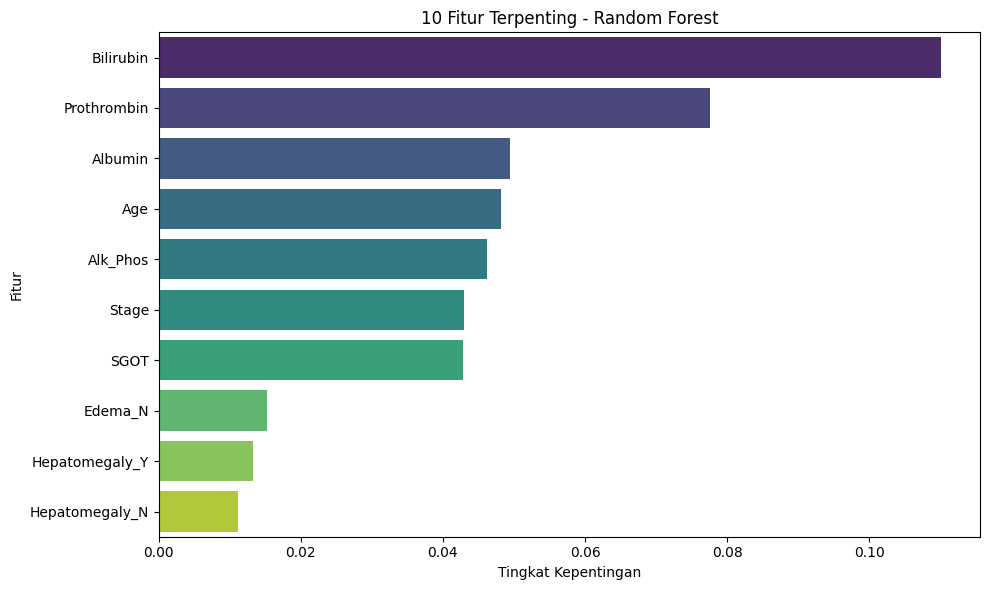

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 7. Menampilkan 10 fitur paling penting dari Random Forest
feature_importances = rf_model.feature_importances_
feature_names = X_encoded.columns  # Asumsikan X_encoded adalah nama dataframe setelah encoding
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# 8. Visualisasi fitur penting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('10 Fitur Terpenting - Random Forest')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


## Evaluasi
Pada tahapan evaluasi ini, dua model klasifikasi yaitu Logistic Regression dan Random Forest digunakan untuk memprediksi kelangsungan hidup pasien sirosis berdasarkan data yang telah melalui tahap praproses. Model Logistic Regression merupakan metode linier yang bekerja dengan baik pada data yang memiliki hubungan linear antar fitur. Model ini dilatih menggunakan data training dan diuji menggunakan data testing, menghasilkan nilai akurasi dan metrik evaluasi lainnya seperti precision, recall, dan f1-score yang diperoleh melalui classification_report. Hasil evaluasi ini memberikan gambaran awal sejauh mana model dapat membedakan antara kelas-kelas yang ada pada data target.

Sementara itu, Random Forest adalah metode ensemble berbasis pohon keputusan yang cenderung lebih kuat dalam menangani data yang kompleks dan non-linear. Dengan menggunakan beberapa pohon keputusan secara bersamaan, Random Forest dapat meningkatkan akurasi dan mengurangi risiko overfitting. Setelah model ini dilatih, hasil prediksi dievaluasi dengan cara yang sama seperti Logistic Regression. Melalui perbandingan akurasi dan metrik-metrik lainnya, dapat dilihat model mana yang memberikan performa terbaik dalam klasifikasi kelangsungan hidup pasien. Evaluasi ini sangat penting untuk menentukan model yang paling layak digunakan pada implementasi nyata.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluasi Model Logistic Regression:
Accuracy: 0.6428571428571429
Classification Report:
               precision    recall  f1-score   support

           C       0.65      0.75      0.69        44
          CL       0.00      0.00      0.00         4
           D       0.70      0.58      0.64        36

    accuracy                           0.64        84
   macro avg       0.45      0.44      0.44        84
weighted avg       0.64      0.64      0.64        84



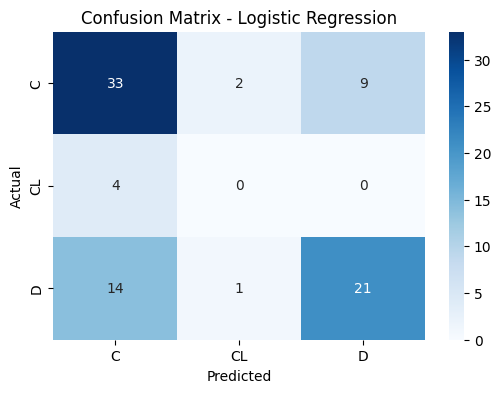

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Evaluasi Model Random Forest:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           C       0.77      0.84      0.80        44
          CL       0.00      0.00      0.00         4
           D       0.72      0.72      0.72        36

    accuracy                           0.75        84
   macro avg       0.50      0.52      0.51        84
weighted avg       0.71      0.75      0.73        84



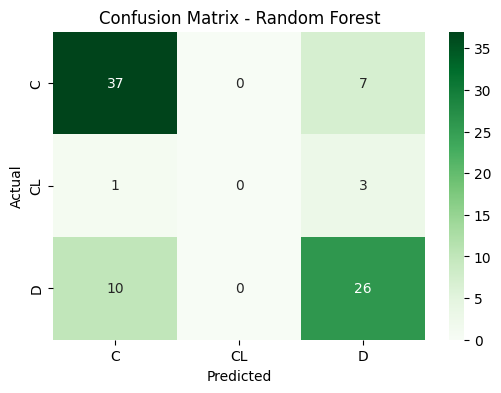

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Logistic Regression
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("\nEvaluasi Model Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg, zero_division=0))

# Visualisasi Confusion Matrix untuk Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nEvaluasi Model Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
